In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
path = 'cleaned_dehire_Plastic_data.csv'

In [3]:
df = pd.read_csv(path, parse_dates=['DATE'])
df = df.set_index('DATE')
df

,QUANTITY
DATE,
2019-12-01,10942
2020-01-01,11941
2020-02-01,12103
2020-03-01,12793
2020-04-01,12169
2020-05-01,12374
2020-06-01,12185
2020-07-01,12389
2020-08-01,12345


In [4]:
df.shape

(36, 1)

In [5]:
train=df.head(24)
test=df.tail(12)

In [31]:
test.to_csv('test.csv')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
scale = scaler.fit(train)
import joblib
joblib.dump(scale,'scale')
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [8]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
generator

In [10]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.35729614 0.41523605 0.66201717 0.4388412  0.51216023
 0.44456366 0.51752504 0.50178827 0.43168813 0.60801144 0.69706724]
Predict this y: 
 [[0.30293276]]


In [11]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(generator,epochs=50)

Epoch 1/50
12/12 [==============================] - 2s 7ms/step - loss: 0.5153
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1834
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0208
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0240
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0184
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0206
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0194
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0206
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0203
Epoch 10/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0223
Epoch 11/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0203
Epoch 12/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0187
Epoch 13/50
12/12 [==============================

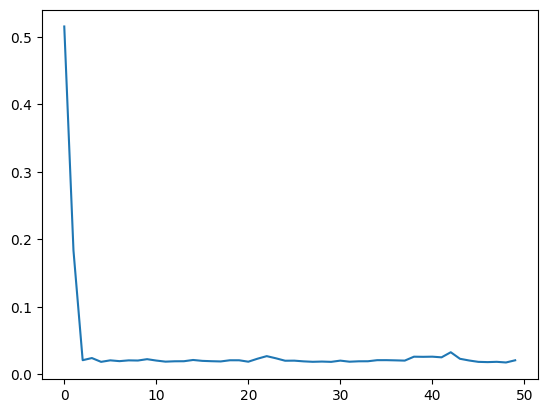

In [16]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [17]:
last_train_batch = scaled_train[-12:]

In [18]:
n_input

12

In [19]:
n_features

1

In [20]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [21]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 232ms/step


array([[0.9346748]], dtype=float32)

In [22]:
scaled_test[0]

array([0.60586552])

In [23]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [24]:
test_predictions

[array([0.9346748], dtype=float32),
 array([1.0187516], dtype=float32),
 array([1.0675133], dtype=float32),
 array([1.0957732], dtype=float32),
 array([1.1008377], dtype=float32),
 array([1.1367016], dtype=float32),
 array([1.1731366], dtype=float32),
 array([1.2207693], dtype=float32),
 array([1.2608202], dtype=float32),
 array([1.3275969], dtype=float32),
 array([1.4101714], dtype=float32),
 array([1.468231], dtype=float32)]

In [25]:
test.head()

,QUANTITY
DATE,
2021-12-01,12636
2022-01-01,13635
2022-02-01,13797
2022-03-01,14487
2022-04-01,13863


In [26]:
true_predictions = scaler.inverse_transform(test_predictions)

In [27]:
test['Predictions'] = true_predictions

C:\Users\mma\AppData\Local\Temp\ipykernel_11440\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot: xlabel='DATE'>

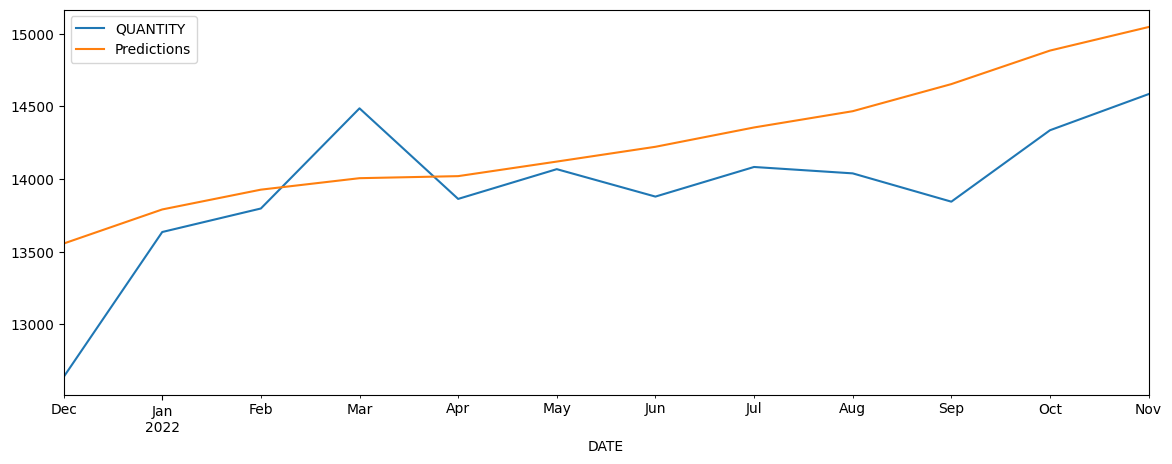

In [28]:
test.plot(figsize=(14,5))   

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['QUANTITY'],test['Predictions']))
print(rmse)

473.57160218742354


In [30]:
model.save('Forecasting.h5')